In [31]:
# Basic packages
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# For preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# For imbalance handling
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [33]:
# Load the CSV file
df = pd.read_csv(r"C:\Users\dhanu\Downloads\Crop_production.csv")

# View shape and first few rows
print("Shape of the dataset:", df.shape)
df.head()

Shape of the dataset: (340414, 10)


,State,District,Crop,Year,Season,Area,Area.Units,Production,Production.Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [35]:
# Data types and nulls
df.info()

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340414 entries, 0 to 340413
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             340414 non-null  object 
 1   District          340414 non-null  object 
 2   Crop              340414 non-null  object 
 3   Year              340414 non-null  object 
 4   Season            340414 non-null  object 
 5   Area              340414 non-null  float64
 6   Area.Units        340414 non-null  object 
 7   Production        340414 non-null  float64
 8   Production.Units  340414 non-null  object 
 9   Yield             340414 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.0+ MB

Missing values:
 State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area.Units          0
Production          0
Production.Units    0
Yield               0
dtype: int64

Duplicat

In [37]:
# Basic statistics
df.describe(include='all')

,State,District,Crop,Year,Season,Area,Area.Units,Production,Production.Units,Yield
count,340414,340414,340414,340414,340414,3.404140e+05,340414,3.404140e+05,340414,340414.000000
unique,36,728,56,24,6,NaN,1,NaN,3,NaN
top,Uttar Pradesh,BILASPUR,Rice,2019-20,Kharif,NaN,Hectare,NaN,Tonnes,NaN
freq,44635,1214,21573,19000,136165,NaN,340414,NaN,326999,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.182535e+04,NaN,9.583829e+05,NaN,80.564577
std,NaN,NaN,NaN,NaN,NaN,4.612484e+04,NaN,2.153044e+07,NaN,923.232000
min,NaN,NaN,NaN,NaN,NaN,8.000000e-03,NaN,0.000000e+00,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,8.000000e+01,NaN,8.700000e+01,NaN,0.567920
50%,NaN,NaN,NaN,NaN,NaN,5.630000e+02,NaN,7.170000e+02,NaN,1.025000
75%,NaN,NaN,NaN,NaN,NaN,4.257000e+03,NaN,7.176000e+03,NaN,2.500000


In [39]:
# Convert "2001-02" to 2001
df['Year'] = df['Year'].astype(str).str[:4].astype(int)

# Confirm dtype
print(df['Year'].head(), df['Year'].dtype)

0    2001
1    2002
2    2003
3    2001
4    2002
Name: Year, dtype: int32 int32


In [41]:
print("Area Units:\n", df['Area.Units'].value_counts())
print("\nProduction Units:\n", df['Production.Units'].value_counts())

Area Units:
 Area.Units
Hectare    340414
Name: count, dtype: int64

Production Units:
 Production.Units
Tonnes    326999
Bales      10524
Nuts        2891
Name: count, dtype: int64


In [43]:
# Drop the  unit column – now redundant #contains same values not needed for modelling
df.drop('Area.Units', axis=1, inplace=True)

In [45]:
# Standardize casing and spacing
df['Production.Units'] = df['Production.Units'].str.strip().str.lower()

# Check unique values again
print(df['Production.Units'].value_counts())

Production.Units
tonnes    326999
bales      10524
nuts        2891
Name: count, dtype: int64


In [49]:
df = df[df['Production.Units'] == 'tonnes'].copy()

# Drop the unit column after filtering
df.drop('Production.Units', axis=1, inplace=True)

In [51]:
df.columns

Index(['State', 'District', 'Crop', 'Year', 'Season', 'Area', 'Production',
       'Yield'],
      dtype='object')

Exploratory Data Analysis (EDA)

🎯 Objective:

Understand patterns in fraudulent vs. non-fraudulent transactions using visual analysis.

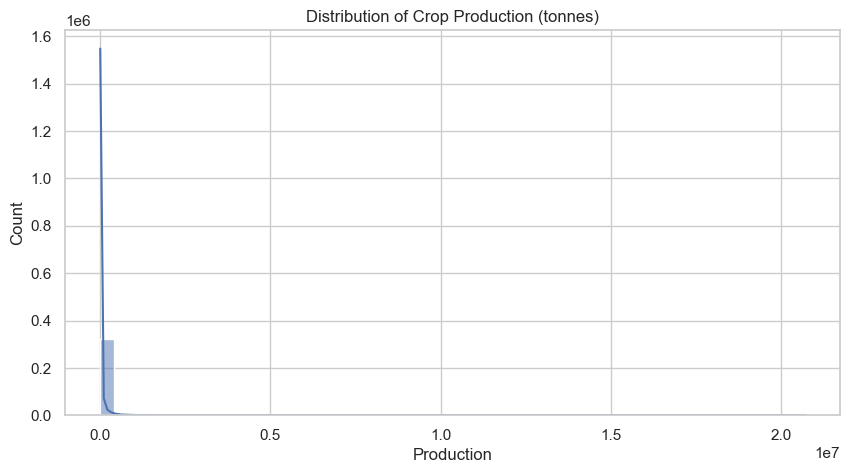

In [55]:
#Basic Distribution of Target Column — Production
plt.figure(figsize=(10, 5))
sns.histplot(df['Production'], bins=50, kde=True)
plt.title("Distribution of Crop Production (tonnes)")
plt.xlabel("Production")
plt.ylabel("Count")
plt.show()

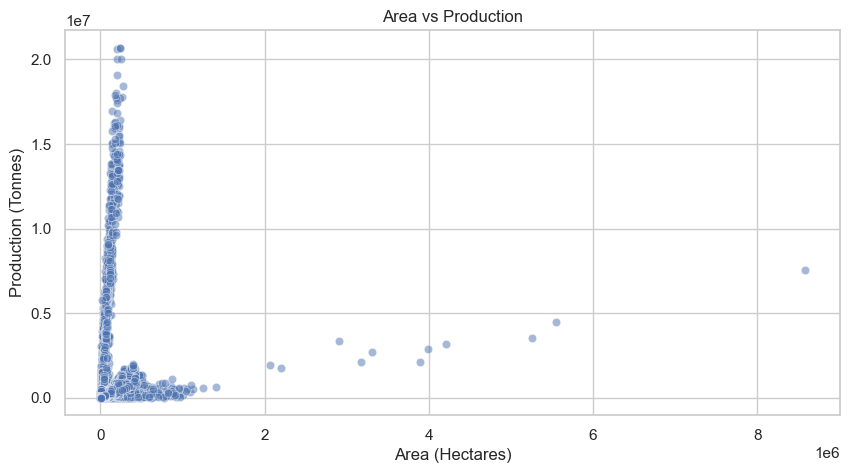

In [57]:
#Area vs Production

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Area', y='Production', data=df, alpha=0.5)
plt.title("Area vs Production")
plt.xlabel("Area (Hectares)")
plt.ylabel("Production (Tonnes)")
plt.show()

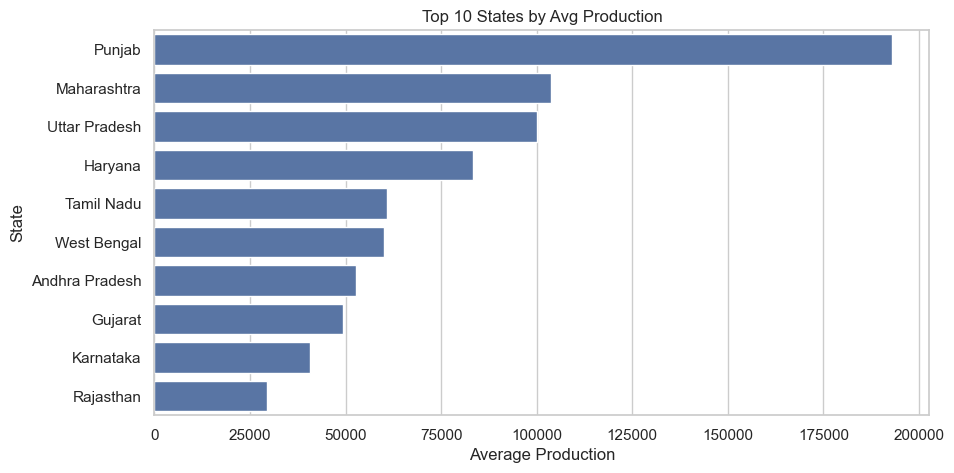

In [59]:
#Average Production per State (Top 10)

state_prod = df.groupby('State')['Production'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=state_prod.values, y=state_prod.index)
plt.title("Top 10 States by Avg Production")
plt.xlabel("Average Production")
plt.ylabel("State")
plt.show()

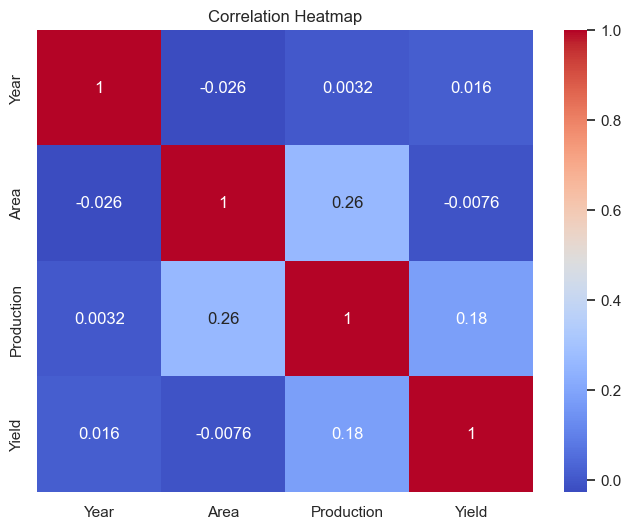

In [61]:
#Correlation Matrix

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Feature Encoding

We need to convert categorical columns into numerical values so models can use them.

In [63]:
# Create encoders for each categorical column
state_encoder = LabelEncoder()
district_encoder = LabelEncoder()
crop_encoder = LabelEncoder()
season_encoder = LabelEncoder()

# Fit and transform the columns
df['State'] = state_encoder.fit_transform(df['State'])
df['District'] = district_encoder.fit_transform(df['District'])
df['Crop'] = crop_encoder.fit_transform(df['Crop'])
df['Season'] = season_encoder.fit_transform(df['Season'])

In [69]:
#final Feature Columns

# Define X (features) and y (target)
X = df[['Year', 'Area', 'Crop', 'Season', 'State', 'District']]
y = df['Production']

In [71]:
#Train-Test Split

#Split  dataset into training and testing sets:

from sklearn.model_selection import train_test_split

X = df[['Year', 'Area', 'Crop', 'Season', 'State', 'District']]
y = df['Production']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [73]:
#Train Models and Evaluate
#Linear REgression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print("--- Linear Regression ---")
print("RMSE:", mean_squared_error(y_test, lr_preds, squared=False))
print("R² Score:", r2_score(y_test, lr_preds))

--- Linear Regression ---
RMSE: 366467.972148163
R² Score: 0.08019519700202993


In [75]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("\n--- Random Forest ---")
print("RMSE:", mean_squared_error(y_test, rf_preds, squared=False))
print("R² Score:", r2_score(y_test, rf_preds))


--- Random Forest ---
RMSE: 61192.23219072953
R² Score: 0.9743542021514665


In [77]:
#XGBoost

from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

print("\n--- XGBoost ---")
print("RMSE:", mean_squared_error(y_test, xgb_preds, squared=False))
print("R² Score:", r2_score(y_test, xgb_preds))


--- XGBoost ---
RMSE: 66624.77654671115
R² Score: 0.9695984900724391


In [83]:
import joblib
import os

# Create a models folder if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the best model (Random Forest)
joblib.dump(rf, 'models/crop_production_model.pkl')

# Save encoders
joblib.dump(state_encoder, 'models/state_encoder.pkl')
joblib.dump(district_encoder, 'models/district_encoder.pkl')
joblib.dump(crop_encoder, 'models/crop_encoder.pkl')
joblib.dump(season_encoder, 'models/season_encoder.pkl')

# Save feature column order (to ensure prediction works with manual input)
joblib.dump(X.columns.tolist(), 'models/model_features.pkl')

print("✅ All models and encoders saved successfully!")

✅ All models and encoders saved successfully!
